<a href="https://colab.research.google.com/github/mohansivasai/Horses-Vs-Humans/blob/master/Horses-or-Humans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# getting the Training data 
# creditcs: Lawrence Morony
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-04-13 12:20:54--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 2404:6800:4008:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   132MB/s    in 1.1s    

2020-04-13 12:20:55 (132 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [2]:
# Get the Validation data
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2020-04-13 12:21:05--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 2404:6800:4008:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  24.6MB/s    in 0.4s    

2020-04-13 12:21:06 (24.6 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



In [3]:
#Importing the dependencies
 import numpy as  np
 import os
 import zipfile 
 import matplotlib.pyplot as plt
 import seaborn as sns
 import tensorflow as  tf
 from tensorflow import keras
 %matplotlib inline
 print(tf.__version__)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


2.2.0-rc2


In [0]:
# unzipping the data
local_ref = '/tmp/horse-or-human.zip'
files = zipfile.ZipFile(local_ref,mode='r')
files.extractall('/tmp/horses-or-humans')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()
files.close()

In [0]:
#Directory with the training horse pictures
train_horse_dir = os.path.join('/tmp/horses-or-humans/horses')
# Directory with the training humans pictures
train_human_dir = os.path.join('/tmp/horses-or-humans/humans')

In [6]:
print('total Training horse images :',len(os.listdir(train_horse_dir)))
print('total traing human images:',len(os.listdir(train_human_dir)))

total Training horse images : 500
total traing human images: 527


In [7]:
#Directory with the Valiodation horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')
# Directory with the Validation humans pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')
print('total Validation horse images :',len(os.listdir(validation_horse_dir)))
print('total validation human images:',len(os.listdir(validation_human_dir)))

total Validation horse images : 128
total validation human images: 128


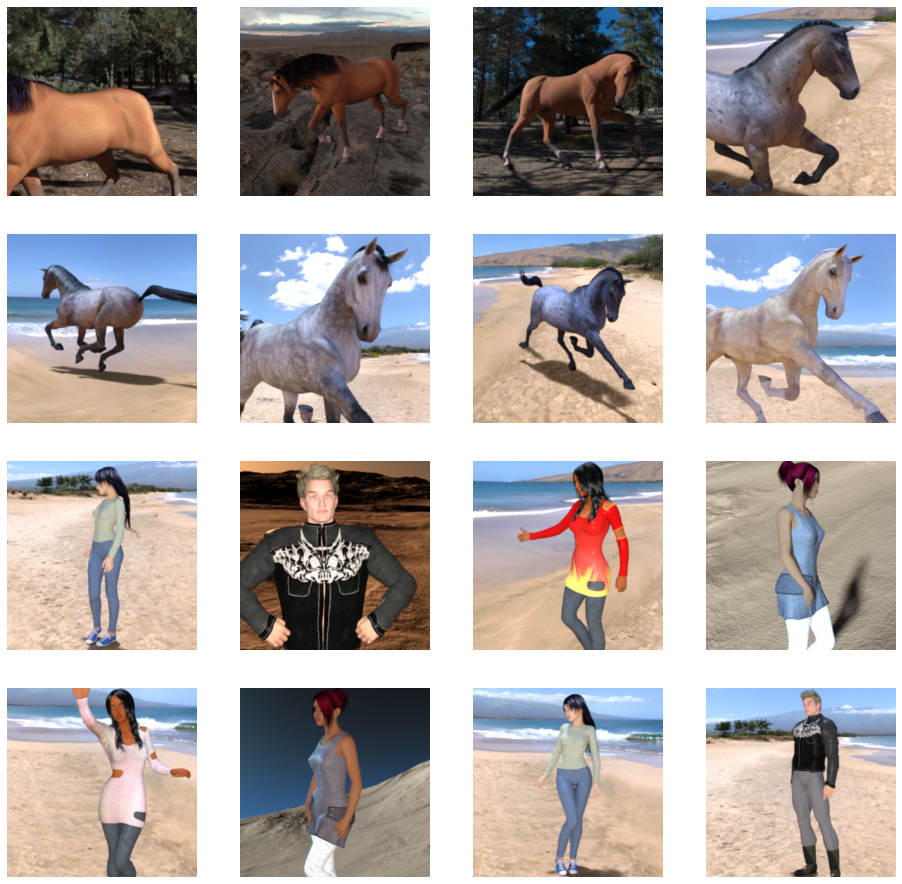

In [8]:
import matplotlib.image as mpimg
nrows = 4
ncols = 4
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
pic_index = 0
pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in os.listdir(train_horse_dir)[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in os.listdir(train_human_dir)[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

In [9]:
# building the model
model = tf.keras.models.Sequential([
                                    # fisrt Convolution layer
                                    keras.layers.Conv2D(32,(3,3),activation='relu',input_shape = (300,300,3)),
                                    keras.layers.MaxPooling2D(2,2),
                                    # second convolution layer
                                    keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    keras.layers.MaxPooling2D(2,2),
                                    #third conv layer
                                    keras.layers.Conv2D(128,(3,3),activation='relu'),
                                    keras.layers.MaxPooling2D(2,2),
                                    #DNN
                                    keras.layers.Flatten(),
                                    keras.layers.Dense(512,activation='relu'),
                                    keras.layers.Dense(1,activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 156800)            0

In [0]:
# Compile  the model
model.compile(optimizer= keras.optimizers.RMSprop(learning_rate=0.002),
              loss='binary_crossentropy',
              metrics= ['accuracy'])

Data Preprocessing :

Let's set up data generators that will read pictures in our source folders, convert them to float32 tensors, and feed them (with their labels) to our network. We'll have one generator for the training images and one for the validation images. Our generators will yield batches of images of size 300x300 and their labels (binary).

As you may already know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network. (It is uncommon to feed raw pixels into a convnet.) In our case, we will preprocess our images by normalizing the pixel values to be in the [0, 1] range (originally all values are in the [0, 255] range).

In Keras this can be done via the keras.preprocessing.image.ImageDataGenerator class using the rescale parameter. This ImageDataGenerator class allows you to instantiate generators of augmented image batches (and their labels) via .flow(data, labels) or .flow_from_directory(directory). These generators can then be used with the Keras model methods that accept data generators as inputs: fit, evaluate_generator, and predict_generator.

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir = '/tmp/horses-or-humans'
validation_dir = '/tmp/validation-horse-or-human'
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
# Flow training images in batches of 16 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (300,300),
    batch_size =16,
    class_mode = 'binary'
    )
# Flow Validation images in batches of 16 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (300,300),
    batch_size = 16,
    class_mode ='binary' 
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [0]:
# training the model
#fig_generator is updated with fit-which can 
hist = model.fit(
    train_generator,
    steps_per_epoch = 50,
    epochs = 15,
    verbose = 1,
    validation_data = validation_generator,
)

In [0]:
# Running the model for prediction
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

In [0]:
# Visualizing the convolutions
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

Note:
As you can see we go from the raw pixels of the images to increasingly abstract and compact representations. The representations downstream start highlighting what the network pays attention to, and they show fewer and fewer features being "activated"; most are set to zero. This is called "sparsity." Representation sparsity is a key feature of deep learning.

These representations carry increasingly less information about the original pixels of the image, but increasingly refined information about the class of the image. You can think of a convnet (or a deep network in general) as an information distillation pipeline. 

In [0]:
# plpotting the Accuracy and Loss for both the training and validation 
acc = hist.history['accuracy']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = hist.epoch
plt.plot(epochs,acc,'r','training acc')
plt.plot(epochs,val_acc,'b','validation acc')
plt.title('Training and Validation accuracy')
plt.figure()
plt.plot(epochs,loss,'r','training loss')
plt.plot(epochs,val_loss,'b','validation loss')
plt.title('Training and Validation losses')